In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ortho_group
import pickle
from sklearn.metrics import pairwise_distances, pairwise_kernels
import sklearn.gaussian_process as gp
from sklearn.gaussian_process.kernels import RBF
import networkx as nx
from tqdm.notebook import tqdm

import os
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning) 

import pandas as pd

import copy


import hypernetx as hnx

import pygenstability as pgs
from pygenstability import plotting

In [2]:
import networkx as nx
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns

import scipy as sc
import scipy.sparse as sp

In [4]:
# CHECKPOINT
edges_li = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/dHSIC_LI.pkl', 'rb'))
edges_lmi = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/dHSIC_LMI.pkl', 'rb'))
edges_umi = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/dHSIC_UMI.pkl', 'rb'))
edges_hi = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/dHSIC_HI.pkl', 'rb'))

In [5]:
# CHECKPOINT
Adj2_li = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj2_li.pkl', 'rb'))
Adj2_lmi = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj2_lmi.pkl', 'rb'))
Adj2_umi = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj2_umi.pkl', 'rb'))
Adj2_hi = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj2_hi.pkl', 'rb'))

In [6]:
# CHECKPOINT
Aw_li = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj_li.pkl', 'rb'))
Aw_lmi = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj_lmi.pkl', 'rb'))
Aw_umi = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj_umi.pkl', 'rb'))
Aw_hi = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj_hi.pkl', 'rb'))

In [7]:
def get_adjacency(H):
    
    """ Construct weighted adjacency matrix for HyperGraph H
    
    Arguments
    H : Hypernetx hypergraph object
    
    """

    incidence = H.incidence_matrix().toarray()
    
    # hyperedge adjacency matrix
    C = np.matmul(incidence.T,incidence)
    A = np.matmul(incidence,incidence.T)

    R = np.matmul(incidence, np.matmul(np.diag(np.diag(C)),incidence.T))

    # defining transition matrix
    adj = R - A
    np.fill_diagonal(adj,0)

    
    return adj

In [8]:
def compute_and_plot_eigenvector_hypergraph(g, pos, n_labels, weight=True):
    g.edges(data=True)
    if weight==True:
        ec = nx.eigenvector_centrality(g, weight='weight')
    else:
        ec = nx.eigenvector_centrality(g)
    colors = list(ec.values())

    cmap=plt.cm.Blues
    vmin = min(colors)
    vmax = max(colors)
    nx.draw(g,pos=pos,node_size=800,node_color=colors,cmap=cmap,vmin=vmin, vmax=vmax)
    labels=nx.draw_networkx_labels(g,pos, labels=n_labels)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
    sm._A = []
    plt.colorbar(sm)
    plt.show()
    
    return ec

# Low Income

## Hypergraph

In [9]:
H_li = hnx.Hypergraph(edges_li)

# weighted adjacency matrix
graph_li = sp.csr_matrix(get_adjacency(H_li))

# construct network object just for plotting
g_li = nx.Graph(graph_li)
pos_li_h = nx.circular_layout(g_li, scale=1)

# node names
H_li.nodes

EntitySet(_:Nodes,['4', '16', '5', '1', '9', '6', '17', '13', '12', '10', '14', '3', '8', '15', '2', '11', '7'],{})

In [10]:
# create dictionary with node names
n_labels_li = {}
nodes_li = ['4', '16', '5', '1', '9', '6', '17', '13', '12', '10', '14', '3', '8', '15', '2', '11', '7']
for i in range(len(nodes_li)):
    n_labels_li[i] = nodes_li[i]

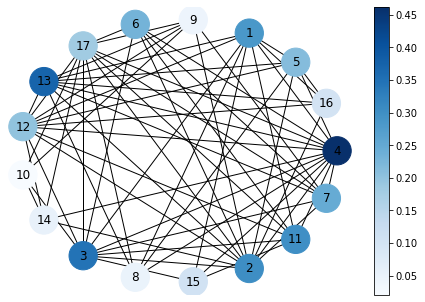

In [11]:
ec_li = compute_and_plot_eigenvector_hypergraph(g_li, pos_li_h, n_labels_li)

## 3-way edges

In [12]:
Hli_restrict_edges3 = H_li.restrict_to_edges(list(e for e in edges_li if len(edges_li[e])==3))

# weighted adjacency matrix
graph_li3 = sp.csr_matrix(get_adjacency(Hli_restrict_edges3))

# construct network object for plotting
g_li3 = nx.Graph(graph_li3)
pos_li3 = nx.circular_layout(g_li3, scale=1)

# node names
Hli_restrict_edges3.nodes

EntitySet(_:Nodes,['4', '5', '1', '6', '13', '17', '12', '14', '3', '2', '11', '7'],{})

In [13]:
# create dictionary with node names
n_labels_li3 = {}
nodes_li3 = ['4', '5', '1', '6', '13', '17', '12', '14', '3', '2', '11', '7']
for i in range(len(nodes_li3)):
    n_labels_li3[i] = nodes_li3[i]

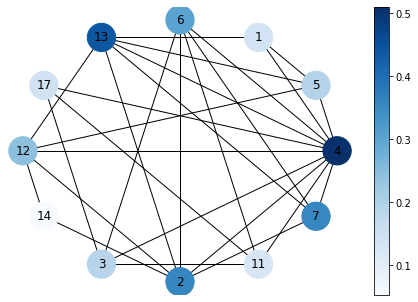

In [14]:
ec_li3 = compute_and_plot_eigenvector_hypergraph(g_li3, pos_li3, n_labels_li3)

# Loewr Middke Income

## Hypergraph

In [15]:
H_lmi = hnx.Hypergraph(edges_lmi)

# weighted adjacency matrix
graph_lmi = sp.csr_matrix(get_adjacency(H_lmi))

# construct network object just for plotting
g_lmi = nx.Graph(graph_lmi)
pos_lmi_h = nx.circular_layout(g_lmi, scale=1)

# node names
H_lmi.nodes

EntitySet(_:Nodes,['4', '5', '16', '1', '9', '6', '13', '17', '12', '10', '14', '3', '8', '15', '2', '11', '7'],{})

In [16]:
# create dictionary with node names
n_labels_lmi = {}
nodes_lmi = ['4', '5', '16', '1', '9', '6', '13', '17', '12', '10', '14', '3', '8', '15', '2', '11', '7']
for i in range(len(nodes_lmi)):
    n_labels_lmi[i] = nodes_lmi[i]

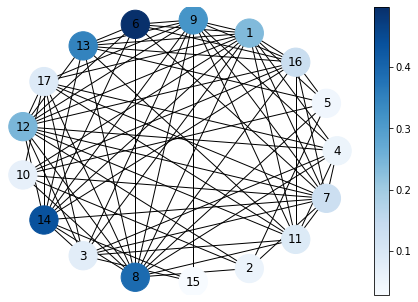

In [17]:
ec_lmi = compute_and_plot_eigenvector_hypergraph(g_lmi, pos_lmi_h, n_labels_lmi)

# 3-way edges

In [18]:
Hlmi_restrict_edges3 = H_lmi.restrict_to_edges(list(e for e in edges_lmi if len(edges_lmi[e])==3))

# weighted adjacency matrix
graph_lmi3 = sp.csr_matrix(get_adjacency(Hlmi_restrict_edges3))

# construct network object for plotting
g_lmi3 = nx.Graph(graph_lmi3)
pos_lmi3 = nx.circular_layout(g_lmi3, scale=1)

# node names
Hlmi_restrict_edges3.nodes

EntitySet(_:Nodes,['5', '16', '1', '9', '6', '17', '13', '14', '10', '12', '3', '8', '2', '11', '7'],{})

In [19]:
# create dictionary with node names
n_labels_lmi3 = {}
nodes_lmi3 = ['5', '16', '1', '9', '6', '17', '13', '14', '10', '12', '3', '8', '2', '11', '7']
for i in range(len(nodes_lmi3)):
    n_labels_lmi3[i] = nodes_lmi3[i]

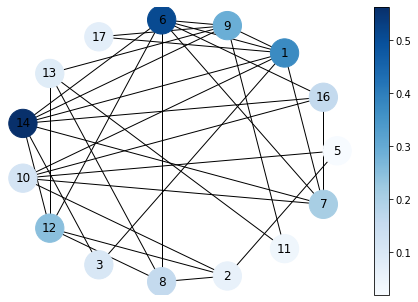

In [20]:
ec_lmi3 = compute_and_plot_eigenvector_hypergraph(g_lmi3, pos_lmi3, n_labels_lmi3)

# Upper Middle Income

## Hypergraph

In [22]:
H_umi = hnx.Hypergraph(edges_umi)

# weighted adjacency matrix
graph_umi = sp.csr_matrix(get_adjacency(H_umi))

# construct network object just for plotting
g_umi = nx.Graph(graph_umi)
pos_umi_h = nx.circular_layout(g_umi, scale=1)

# node names
H_umi.nodes

EntitySet(_:Nodes,['4', '16', '5', '9', '1', '6', '13', '17', '12', '10', '14', '3', '8', '15', '2', '11', '7'],{})

In [23]:
# create dictionary with node names
n_labels_umi = {}
nodes_umi = ['4', '16', '5', '9', '1', '6', '13', '17', '12', '10', '14', '3', '8', '15', '2', '11', '7']
for i in range(len(nodes_umi)):
    n_labels_umi[i] = nodes_umi[i]

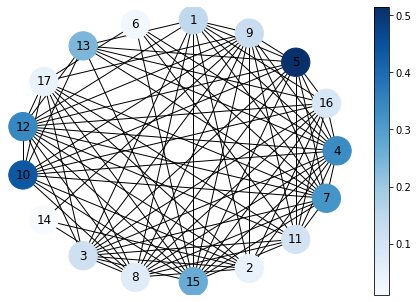

In [24]:
ec_umi = compute_and_plot_eigenvector_hypergraph(g_umi, pos_umi_h, n_labels_umi)

## 3-way edges

In [25]:
Humi_restrict_edges3 = H_umi.restrict_to_edges(list(e for e in edges_umi if len(edges_umi[e])==3))

# weighted adjacency matrix
graph_umi3 = sp.csr_matrix(get_adjacency(Humi_restrict_edges3))

# construct network object for plotting
g_umi3 = nx.Graph(graph_umi3)
pos_umi3 = nx.circular_layout(g_umi3, scale=1)

# node names
Humi_restrict_edges3.nodes

EntitySet(_:Nodes,['4', '5', '16', '1', '9', '13', '14', '10', '12', '3', '8', '15', '2', '11', '7'],{})

In [26]:
# create dictionary with node names
n_labels_umi3 = {}
nodes_umi3 = ['4', '5', '16', '1', '9', '13', '14', '10', '12', '3', '8', '15', '2', '11', '7']
for i in range(len(nodes_umi3)):
    n_labels_umi3[i] = nodes_umi3[i]

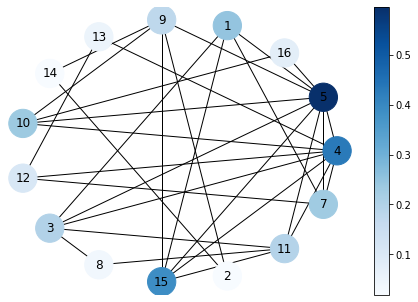

In [27]:
ec_umi3 = compute_and_plot_eigenvector_hypergraph(g_umi3, pos_umi3, n_labels_umi3)

# High Income
## Hypergraph

In [28]:
H_hi = hnx.Hypergraph(edges_hi)

# weighted adjacency matrix
graph_hi = sp.csr_matrix(get_adjacency(H_hi))

# construct network object just for plotting
g_hi = nx.Graph(graph_hi)
pos_hi_h = nx.circular_layout(g_hi, scale=1)

# node names
H_hi.nodes

EntitySet(_:Nodes,['4', '5', '16', '1', '9', '6', '17', '13', '10', '12', '14', '3', '8', '15', '2', '11', '7'],{})

In [29]:
# create dictionary with node names
n_labels_hi = {}
nodes_hi = ['4', '5', '16', '1', '9', '6', '17', '13', '10', '12', '14', '3', '8', '15', '2', '11', '7']
for i in range(len(nodes_hi)):
    n_labels_hi[i] = nodes_hi[i]

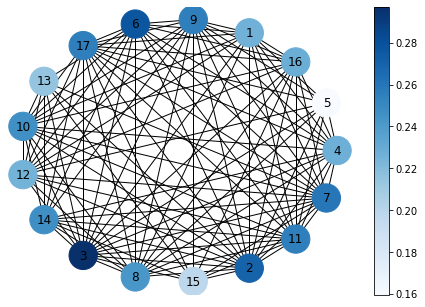

In [30]:
ec_hi = compute_and_plot_eigenvector_hypergraph(g_hi, pos_hi_h, n_labels_hi)

## 3-way edges

In [31]:
Hhi_restrict_edges3 = H_hi.restrict_to_edges(list(e for e in edges_hi if len(edges_hi[e])==3))

# weighted adjacency matrix
graph_hi3 = sp.csr_matrix(get_adjacency(Hhi_restrict_edges3))

# construct network object for plotting
g_hi3 = nx.Graph(graph_hi3)
pos_hi3 = nx.circular_layout(g_hi3, scale=1)

# node names
Hhi_restrict_edges3.nodes

EntitySet(_:Nodes,['6', '13', '14', '3', '15'],{})

In [32]:
# create dictionary with node names
n_labels_hi3 = {}
nodes_hi3 = ['6', '13', '14', '3', '15']
for i in range(len(nodes_hi3)):
    n_labels_hi3[i] = nodes_hi3[i]

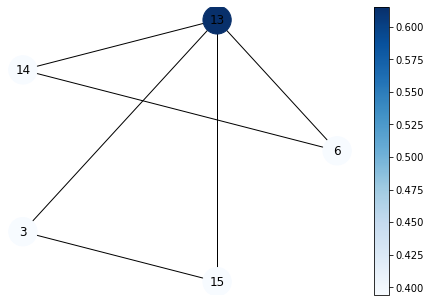

In [33]:
ec_hi3 = compute_and_plot_eigenvector_hypergraph(g_hi3, pos_hi3, n_labels_hi3)